## Exploratory Data Analysis-01
https://drive.google.com/file/d/1KTC8wGjpjoNQVKlN8aBSdcwPvzoSdB-3/view?usp=sharing

In [ ]:
# # Shape of the dataset
# df.shape

# # Checking noise values
# for i in df.columns:
#     print(i,'\n', df[i].sort_values().unique())
    
# # Checking null values
# df.isnull().sum()

# # Checking duplicates
# df[df.duplicated()==True]

# # Checking data types
# df.dtypes

# # 5-point summary
# df.describe()

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df=pd.read_csv('E:/Exploratory_Data_Analysis/EDA_01_CinemaTicket.csv')

In [3]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [4]:
# 1.	What are the columns present in the dataset?
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [5]:
# 2.	How many rows are there in the dataset?
df.shape[0]

142524

In [8]:
# 3.	What is the average total sales?
print('Average total sales:', df['total_sales'].mean())

Average total sales: 12347275.407531364


In [9]:
# 4.	What is the minimum and maximum number of tickets sold ?
df['tickets_sold'].agg([max, min])

max    8499
min       1
Name: tickets_sold, dtype: int64

In [12]:
# 5.	What is the average occupancy percentage?
print('Average occupancy percentage:', round(df['occu_perc'].mean(),2))

Average occupancy percentage: 19.97


In [13]:
# 6.	What is the highest and lowest ticket price?
df['ticket_price'].agg([max,min])

max    700000.000000
min       483.870968
Name: ticket_price, dtype: float64

In [14]:
# 7.	How many unique film codes are there?
df['film_code'].nunique()
print('Number of unique film codes:', len(df['film_code'].unique()))

No of unique film codes: 48


In [15]:
# 8.	How many unique cinema codes are there?
df['cinema_code'].nunique()
print('Number of unique cinema codes:', len(df['cinema_code'].unique()))

No of unique cinema codes: 246


In [20]:
# 9.	What is the total capacity of all cinemas combined?
print('Total capacity of all cinemas:', int(df['capacity'].sum()))

Total capacity of all cinemas: 121711786


In [21]:
# 10.	How many tickets were unused ?                                    
print('Total number of unused tickets:', df['tickets_out'].sum())

Total number of unused tickets: 33837


In [24]:
# 11.	Which film generated the highest total sales?
res=df.groupby('film_code')['total_sales'].sum().to_frame()
res1=res.sort_values(by='total_sales', ascending=False)
res1.reset_index(drop=False, inplace=True)
res1.head(1)

#df.groupby('film_code')['total_sales'].sum().to_frame().max()

,film_code,total_sales
0,1554,372740376637


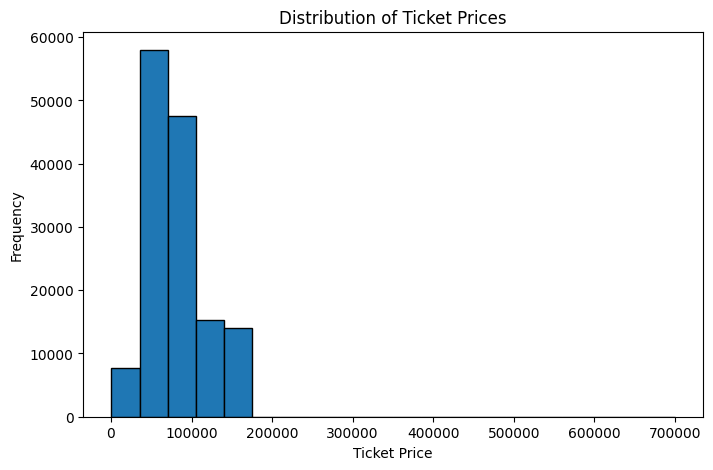

In [33]:
# 12.	What is the distribution of ticket prices?                             
# Hist plot
plt.figure(figsize=(8,5))
plt.hist(df['ticket_price'], bins=20, edgecolor='k')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Prices')
plt.show()

In [30]:
# Statistics for ticket prices
mean_price = round(df['ticket_price'].mean(),2)
median_price = round(df['ticket_price'].median(),2)
std_deviation = round(df['ticket_price'].std(),2)

print(f"Mean Ticket Price: {mean_price}")
print(f"Median Ticket Price: {median_price}")
print(f"Standard Deviation of Ticket Prices: {std_deviation}")

Mean Ticket Price: 81234.6
Median Ticket Price: 79454.24
Standard Deviation of Ticket Prices: 33236.6


In [35]:
# Datatype conversion
df.dtypes
df['date']=df['date'].astype('datetime64')

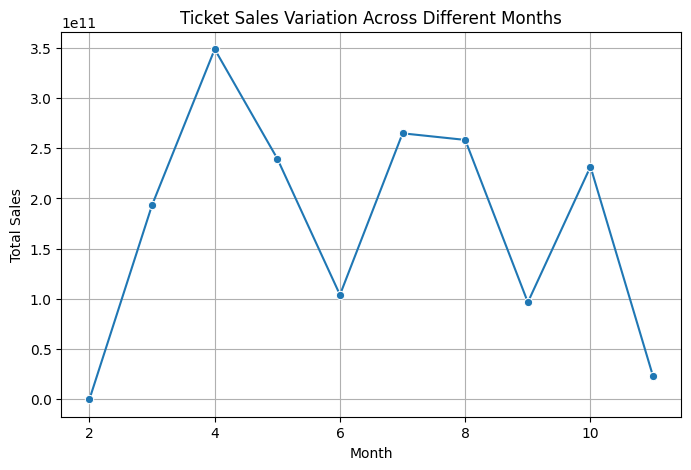

In [38]:
# 13.	How does ticket sales vary across different months?

df13 = df.groupby('month')['total_sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(df13, x='month', y='total_sales', marker='o')
plt.title('Ticket Sales Variation Across Different Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [39]:
# 14.	What is the average occupancy percentage for each quarter?
df.groupby('quarter')['occu_perc'].mean().to_frame()

,occu_perc
quarter,
1,27.010070
2,21.841906
3,17.099627
4,19.492385


In [42]:
# 15.	What is the most common show time?
df15=df['show_time'].value_counts().reset_index()
df15.head()

,index,show_time
0,3,28785
1,2,28535
2,1,23750
3,4,19710
4,6,14555


In [43]:
most_common_show_time = df15.iloc[0]['index']
frequency = df15.iloc[0]['show_time']

print(f"The most common show time is {most_common_show_time} with a frequency of {frequency}.")

The most common show time is 3 with a frequency of 28785.


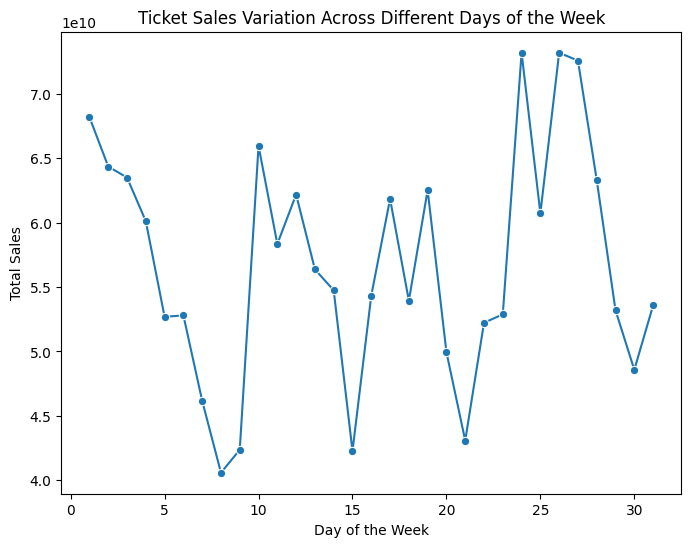

In [46]:
# 16.	How does ticket sales vary across different days of the week?

df16 = df.groupby('day')['total_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(df16, x='day', y='total_sales', marker='o')
plt.title('Ticket Sales Variation Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

In [48]:
# 17.	What is the average ticket price for each film?
df17=df.groupby('film_code')['ticket_price'].mean().round(2).reset_index()
df17.head()

,film_code,ticket_price
0,1471,95374.87
1,1480,90931.88
2,1481,67721.34
3,1482,75269.56
4,1483,81647.98


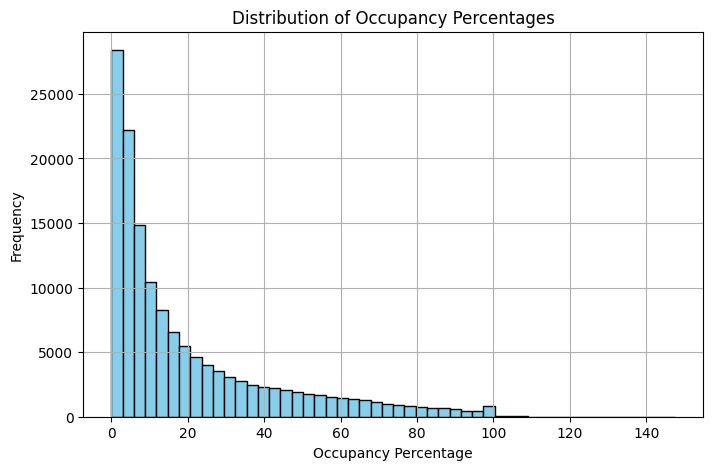

In [52]:
# 18.	What is the distribution of occupancy percentages?
plt.figure(figsize=(8, 5))
plt.hist(df['occu_perc'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Occupancy Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy Percentages')
plt.grid(True)
plt.show()

In [65]:
# 19.	Are there any missing values in the dataset?                                   ---ask---
df[df.duplicated()]
df[(df.duplicated()==True) & (df.cinema_code==163)]          # additional info

df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

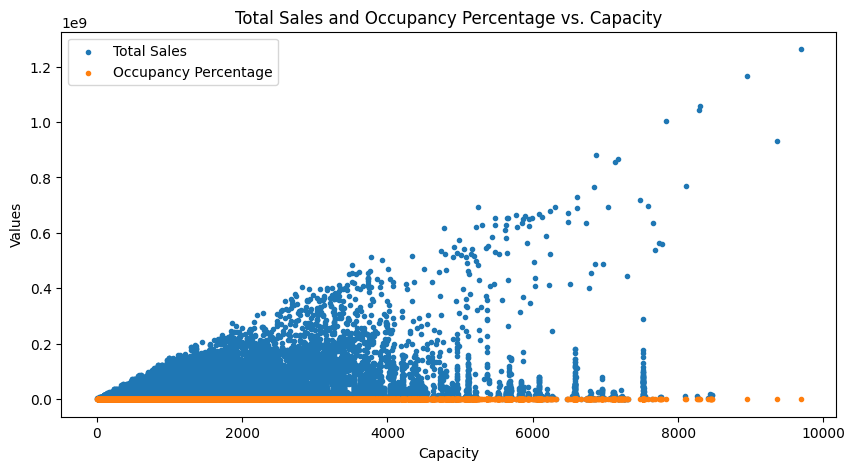

In [73]:
# 20.	How does the total sales and occupancy percentage vary with capacity?

df20 = df.groupby('capacity')[['total_sales', 'occu_perc']].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(df20['capacity'], df20['total_sales'], label='Total Sales', marker='.')
plt.scatter(df20['capacity'], df20['occu_perc'], label='Occupancy Percentage', marker='.')
plt.title('Total Sales and Occupancy Percentage vs. Capacity')
plt.xlabel('Capacity')
plt.ylabel('Values')
plt.legend()
plt.show()

In [74]:
# 21.	What is the correlation between ticket prices and total sales?
df[['ticket_price','total_sales']].corr()

,ticket_price,total_sales
ticket_price,1.00000,0.27245
total_sales,0.27245,1.00000


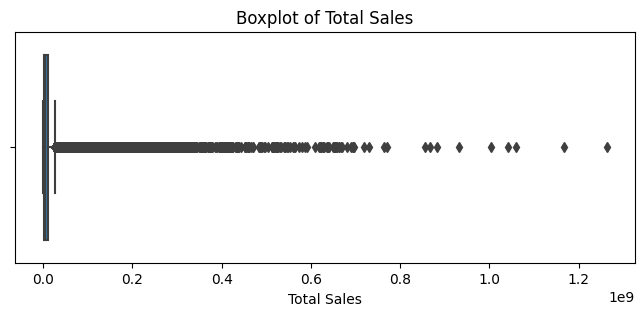

In [78]:
# 22.	Are there any outliers in the distribution of total sales?

plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='total_sales')
plt.xlabel('Total Sales')
plt.title('Boxplot of Total Sales')
plt.show()

### Ticket utilization

In [79]:
# Ticket utilization
def opr_utility(ticket_use, tickets_sold):
    res = ticket_use / tickets_sold
    return res

In [80]:
# Apply the opr_utility function using a lambda function and create the 'utility' column
df['utility'] = df.apply(lambda x: opr_utility(x['ticket_use'], x['tickets_sold']), axis=1)

In [83]:
# 23.	What is the average ticket utilization rate (ticket_use/tickets_sold) for each cinema?
df.groupby('cinema_code')['utility'].mean().round(2).to_frame().head()

,utility
cinema_code,
32,1.0
33,1.0
34,1.0
35,1.0
39,1.0


In [86]:
# 24.	Is there a significant difference in ticket prices between weekdays and weekends?

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# New column 'day_of_week' to store the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# New column 'weekday_or_weekend' to categorize days
df['weekday/weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [90]:
from scipy import stats

weekday_prices = df[df['weekday/weekend'] == 'Weekday']['ticket_price']
weekend_prices = df[df['weekday/weekend'] == 'Weekend']['ticket_price']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(weekday_prices, weekend_prices)

# Check if the p-value is less than the significance level
alpha = 0.05              # significance level 
if p_value < alpha:
    print("There is a significant difference in ticket prices between weekdays and weekends.")
else:
    print("There is no significant difference in ticket prices between weekdays and weekends.")

There is a significant difference in ticket prices between weekdays and weekends.


In [98]:
# 25.	Which cinema has the highest average occupancy percentage?

df25=df.groupby('cinema_code')['occu_perc'].mean().reset_index()
res25=df25.sort_values(by='occu_perc', ascending=False)
res25.columns=['cinema_code','avg_occu_perc']
res25.head(1)

,cinema_code,avg_occu_perc
173,474,64.006711


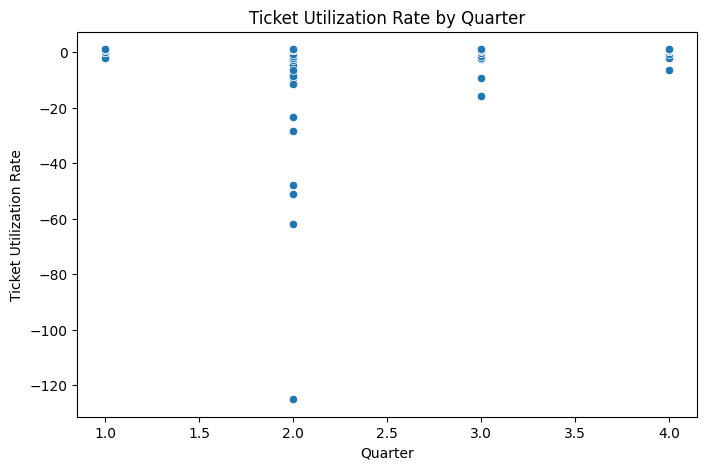

In [105]:
# 26.	How does the ticket utilization rate vary across different quarters?

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='quarter', y='utility')
plt.xlabel('Quarter')
plt.ylabel('Ticket Utilization Rate')
plt.title('Ticket Utilization Rate by Quarter')
plt.show()

In [126]:
# 27.	Are there any significant seasonal patterns in ticket sales?

df27=df[['date', 'total_sales']]
df27.set_index('date', inplace=True)
df27.head()

,total_sales
date,
2018-05-05,3900000
2018-05-05,3360000
2018-05-05,2560000
2018-05-05,1200000
2018-05-05,1200000


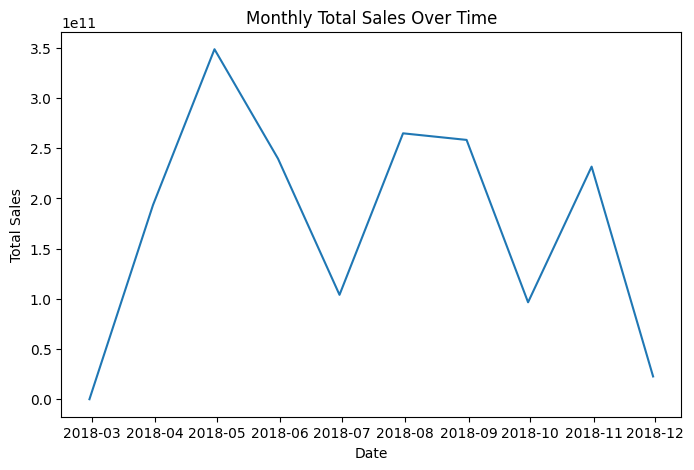

In [128]:
# Line plot
monthly_sales = df27['total_sales'].resample('M').sum()
plt.figure(figsize=(8, 5))
plt.title('Monthly Total Sales Over Time')
plt.plot(monthly_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

ADF Statistic: -3.284530876009979
p-value: 0.015584264659183576


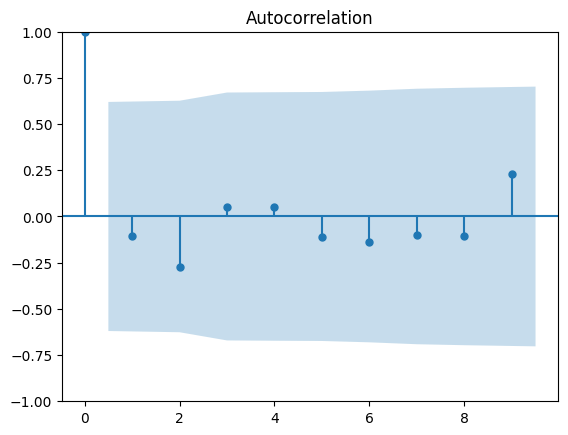

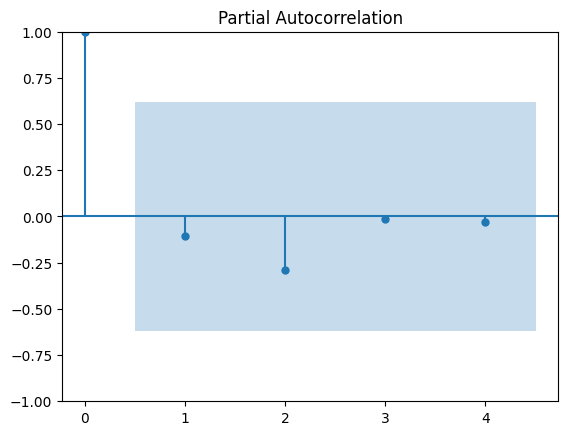

In [136]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(monthly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF to identify seasonality lag
plot_acf(monthly_sales, lags=9)
plot_pacf(monthly_sales, lags=4, method='ywm')
plt.show()

Correlation coefficient: 0.5098120408563703


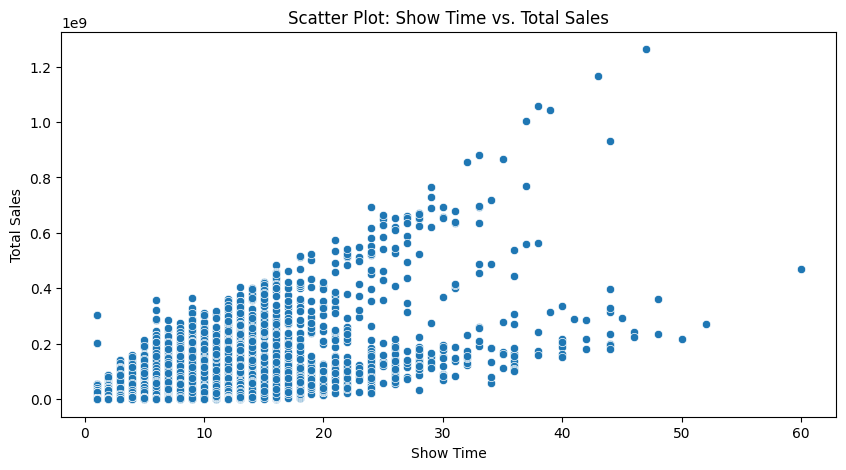

In [117]:
# 28.	Is there a relationship between the show time and total sales?

print('Correlation coefficient:', df['show_time'].corr(df['total_sales']))

plt.figure(figsize=(10, 5))
sns.scatterplot(df, x='show_time', y='total_sales')
plt.xlabel('Show Time')
plt.ylabel('Total Sales')
plt.title('Scatter Plot: Show Time vs. Total Sales')
plt.show()

In [122]:
from sklearn.linear_model import LinearRegression

X = df[['show_time']]  # Independent variable
y = df['total_sales']   # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")

Intercept (b0): -7759466.54360093
Slope (b1): 5113483.464770429


In [108]:
# 29.	What is the average occupancy percentage for each film across all cinemas?
df29=df.groupby('film_code')['occu_perc'].mean().reset_index()
df29.columns= ['film_code','avg_occu_perc']
df29.head()

,film_code,avg_occu_perc
0,1471,22.381223
1,1480,17.475527
2,1481,24.228181
3,1482,28.373278
4,1483,26.215047


In [109]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,utility,day_of_week,weekday/weekend
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,1.0,5,Weekend
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,1.0,5,Weekend
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,1.0,5,Weekend
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,1.0,5,Weekend
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,1.0,5,Weekend


In [110]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day', 'utility', 'day_of_week',
       'weekday/weekend'],
      dtype='object')